In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("D:\\tevta\\DataSet\\gpu_specs_prices.csv")
df

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$1,289.99",https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,"$1,199.99",https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,"$1,794.99",https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,"$2,017.21",https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,"$3,399.99",https://pcbuilder.net/component-details/graphi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,None,$64.99,https://pcbuilder.net/component-details/graphi...,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,None,$54.99,https://pcbuilder.net/component-details/graphi...,0
308,Sapphire Technology Technology Radeon 11276-02...,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,N/A,https://pcbuilder.net/component-details/graphi...,0
309,ZOTAC Gaming GeForce RTX 2080 Ti AMP Extreme 1...,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,N/A,https://pcbuilder.net/component-details/graphi...,0


This dataset contains over 300 listed GPU / video cards / graphics cards with specs and the latest prices that were all scraped in the web database Pcbuilder. Unfortunately, only items that had price displays were included. United States was the selected location, so expect the prices in United States Dollars USD currency.

In [38]:
df['memory'] = df['memory'].str.replace('GB', '')
df['length'] = df['length'].str.replace('mm', '')
df['clock_speed'] = df['clock_speed'].str.replace('MHz', '')
df['base_clock'] = df['base_clock'].str.replace('MHz', '')
df['price'] = df['price'].str.replace('$', '')
df

<ipython-input-38-7481b78be2dd>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,"1,289.99",https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,"1,199.99",https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,"1,794.99",https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,"2,017.21",https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,"3,399.99",https://pcbuilder.net/component-details/graphi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650,1000,None,64.99,https://pcbuilder.net/component-details/graphi...,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,1,DDR3,152,PCIe x16,Radeon HD 5450,650,1000,None,54.99,https://pcbuilder.net/component-details/graphi...,0
308,Sapphire Technology Technology Radeon 11276-02...,SapphireTechnology,Radeon RX VEGA 56,8,HBM2,282,PCIe x16,Radeon RX VEGA 56,1208,1512,FreeSync,N/A,https://pcbuilder.net/component-details/graphi...,0
309,ZOTAC Gaming GeForce RTX 2080 Ti AMP Extreme 1...,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11,GDDR6,324,PCIe x16,GeForce RTX 2080 Ti,1545,1815,G-Sync,N/A,https://pcbuilder.net/component-details/graphi...,0


In [39]:
df.dtypes

name                object
brand               object
model               object
memory              object
memory_interface    object
length              object
interface           object
chipset             object
base_clock          object
clock_speed         object
frame_sync          object
price               object
item_url            object
used                 int64
dtype: object

In [40]:
def clean(column):
    cleaned_column = pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce')
    cleaned_column = cleaned_column.fillna(0)
    return cleaned_column.astype(int)

df['price'] = clean(df['price'])
df['clock_speed'] = clean(df['clock_speed'])
df['base_clock'] = clean(df['base_clock'])
df['memory'] = clean(df['memory'])
df['length'] = clean(df['length'])



In [41]:
df.dtypes

name                object
brand               object
model               object
memory               int32
memory_interface    object
length               int32
interface           object
chipset             object
base_clock           int32
clock_speed          int32
frame_sync          object
price                int32
item_url            object
used                 int64
dtype: object

In [42]:
df.describe()

,memory,length,base_clock,clock_speed,price,used
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.00000
mean,8.668810,254.225080,1488.922830,1764.334405,664.913183,0.33119
std,5.223671,61.923112,306.151892,329.903716,782.030976,0.47140
min,0.000000,0.000000,168.000000,797.000000,0.000000,0.00000
25%,6.000000,227.000000,1350.000000,1635.000000,242.500000,0.00000
50%,8.000000,269.000000,1500.000000,1771.000000,469.000000,0.00000
75%,11.000000,299.000000,1607.000000,1846.000000,799.000000,1.00000
max,48.000000,340.000000,2457.000000,2622.000000,6800.000000,1.00000


In [43]:
df.columns

Index(['name', 'brand', 'model', 'memory', 'memory_interface', 'length',
       'interface', 'chipset', 'base_clock', 'clock_speed', 'frame_sync',
       'price', 'item_url', 'used'],
      dtype='object')

In [44]:
df.isnull().sum()

name                0
brand               0
model               0
memory              0
memory_interface    0
length              0
interface           0
chipset             0
base_clock          0
clock_speed         0
frame_sync          0
price               0
item_url            0
used                0
dtype: int64

No handles with labels found to put in legend.


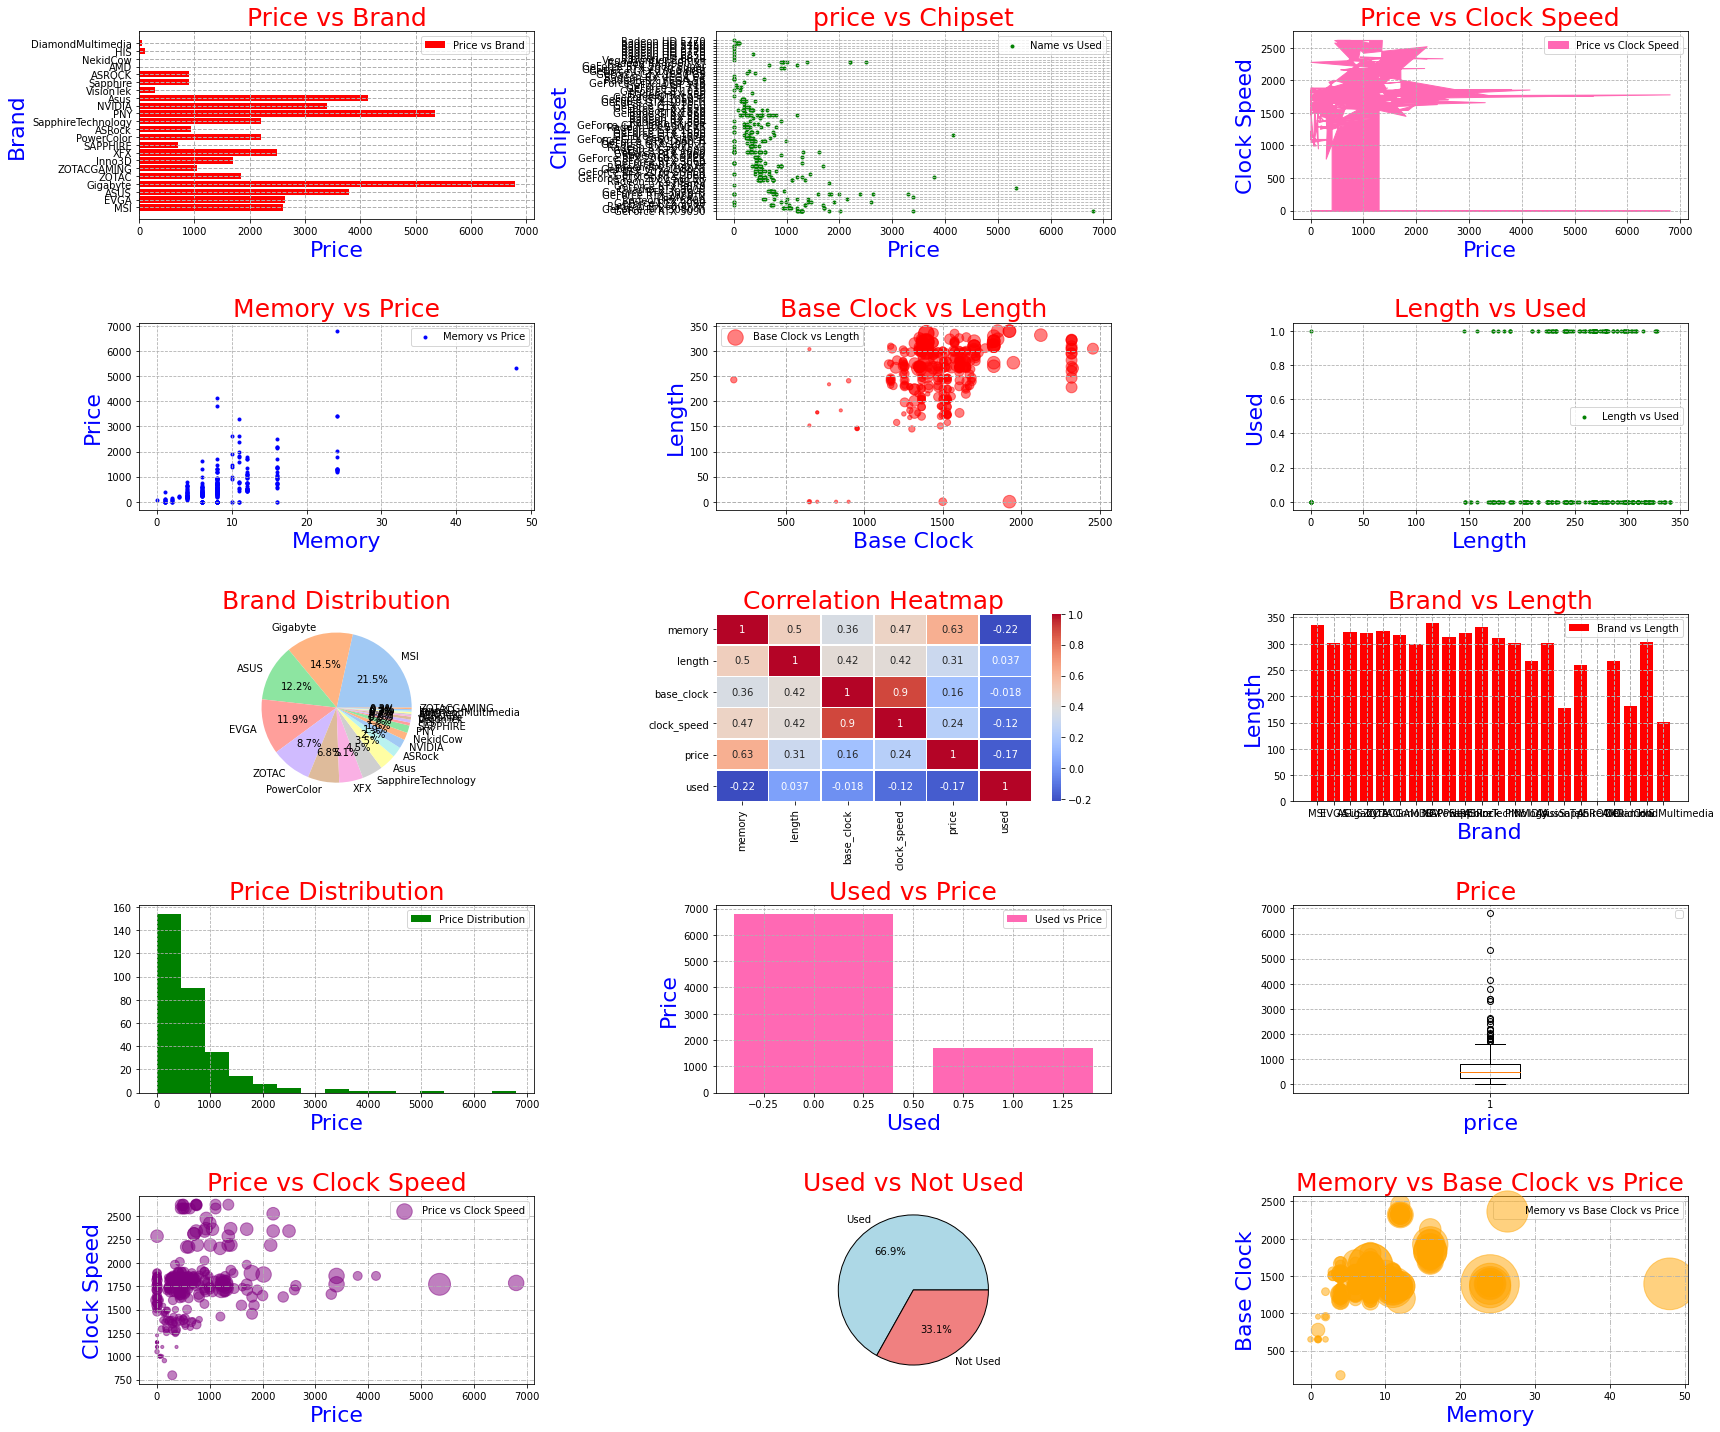

In [68]:
plt.figure(figsize=(24, 20))


# Subplot 1:
plt.subplot(5, 3, 1)
plt.barh(df['brand'], df['price'], label="Price vs Brand", color="red")
plt.legend()
plt.title("Price vs Brand",color='red',size=25)
plt.xlabel("Price",color='blue',size=22)
plt.ylabel("Brand",color='blue',size=22)
plt.grid(linestyle="--", linewidth=1)

# Subplot 2: 
plt.subplot(5, 3, 2)
plt.scatter(df['price'], df['chipset'], marker=".", label="Name vs Used", color="green")
plt.legend()
plt.title("price vs Chipset",color='red',size=25)
plt.xlabel("Price",color='blue',size=22)
plt.ylabel("Chipset",color='blue',size=22)
plt.grid(linestyle="--")


# Subplot 3:
plt.subplot(5, 3, 3)
plt.fill_between(df['price'], df['clock_speed'], label="Price vs Clock Speed", color="hotpink")
plt.legend()
plt.title("Price vs Clock Speed",color='red',size=25)
plt.xlabel("Price",color='blue',size=22)
plt.ylabel("Clock Speed",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 4:
plt.subplot(5, 3, 4)
plt.scatter(df['memory'], df['price'], marker=".", label="Memory vs Price", color="blue")
plt.legend()
plt.title("Memory vs Price",color='red',size=25)
plt.xlabel("Memory",color='blue',size=22)
plt.ylabel("Price",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 5: 
plt.subplot(5, 3, 5)
plt.scatter(df['base_clock'], df['length'], s=df['memory']*10, alpha=0.5, label="Base Clock vs Length", color="red")
plt.legend()
plt.title("Base Clock vs Length",color='red',size=25)
plt.xlabel("Base Clock",color='blue',size=22)
plt.ylabel("Length",color='blue',size=22)
plt.grid(linestyle="--", linewidth=1)

# Subplot 6: 
plt.subplot(5, 3, 6)
plt.scatter(df['length'], df['used'], marker=".", label="Length vs Used", color="green")
plt.legend()
plt.title("Length vs Used",color='red',size=25)
plt.xlabel("Length",color='blue',size=22)
plt.ylabel("Used",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 7:
plt.subplot(5, 3, 7)
brand_counts = df['brand'].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Brand Distribution', color='red',size=25)

# Subplot 8:
plt.subplot(5, 3, 8)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', color='red',size=25)

# Subplot 9: 
plt.subplot(5, 3, 9)
plt.bar(df['brand'], df['length'], label="Brand vs Length", color="red")
plt.legend()
plt.title("Brand vs Length",color='red',size=25)
plt.xlabel("Brand",color='blue',size=22)
plt.ylabel("Length",color='blue',size=22)
plt.grid(linestyle="--", linewidth=1)

# Subplot 10:
plt.subplot(5, 3, 10)
plt.hist(df['price'], bins=15, label="Price Distribution", color="green")
plt.legend()
plt.title("Price Distribution",color='red',size=25)
plt.xlabel("Price",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 11: 
plt.subplot(5, 3, 11)
plt.bar(df['used'], df['price'], label="Used vs Price", color="hotpink")
plt.legend()
plt.title("Used vs Price",color='red',size=25)
plt.xlabel("Used",color='blue',size=22)
plt.ylabel("Price",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 12:
plt.subplot(5, 3, 12)
plt.boxplot(df['price'])
plt.legend()
plt.title("Price ",color='red',size=25)
plt.xlabel("price",color='blue',size=22)
plt.grid(linestyle="--")

# Subplot 13:
plt.subplot(5, 3, 13)
plt.scatter(df['price'], df['clock_speed'], s=df['memory']*10, alpha=0.5, label="Price vs Clock Speed", color="purple")
plt.legend()
plt.title("Price vs Clock Speed",color='red',size=25)
plt.xlabel("Price",color='blue',size=22)
plt.ylabel("Clock Speed",color='blue',size=22)
plt.grid(linestyle="-.")

# Subplot 14:
plt.subplot(5, 3, 14)
used_counts = df['used'].value_counts()
plt.pie(used_counts, labels=['Used', 'Not Used'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
plt.title('Used vs Not Used',color='red',size=25)

# Subplot 15: 
plt.subplot(5, 3, 15)
plt.scatter(df['memory'], df['base_clock'], s=df['price']*0.5, alpha=0.5, label="Memory vs Base Clock vs Price", color="orange")
plt.legend()
plt.title("Memory vs Base Clock vs Price", color='red',size=25)
plt.xlabel("Memory", color='blue',size=22)
plt.ylabel("Base Clock", color='blue',size=22)
plt.grid(linestyle="-.")

plt.tight_layout()
plt.show()
